In [124]:
# Core libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# scikit-learn components
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression

In [125]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target
data = X.copy()
data['MedHouseVal'] = y

In [126]:
# Check data types, Null values
# print(data.info())
data


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [96]:
data.head().reset_index()

,index,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [97]:
# Summary Statistics
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [102]:
for i, col in enumerate(X.columns,1):
    print(i,col)

1 MedInc
2 HouseAge
3 AveRooms
4 AveBedrms
5 Population
6 AveOccup
7 Latitude
8 Longitude


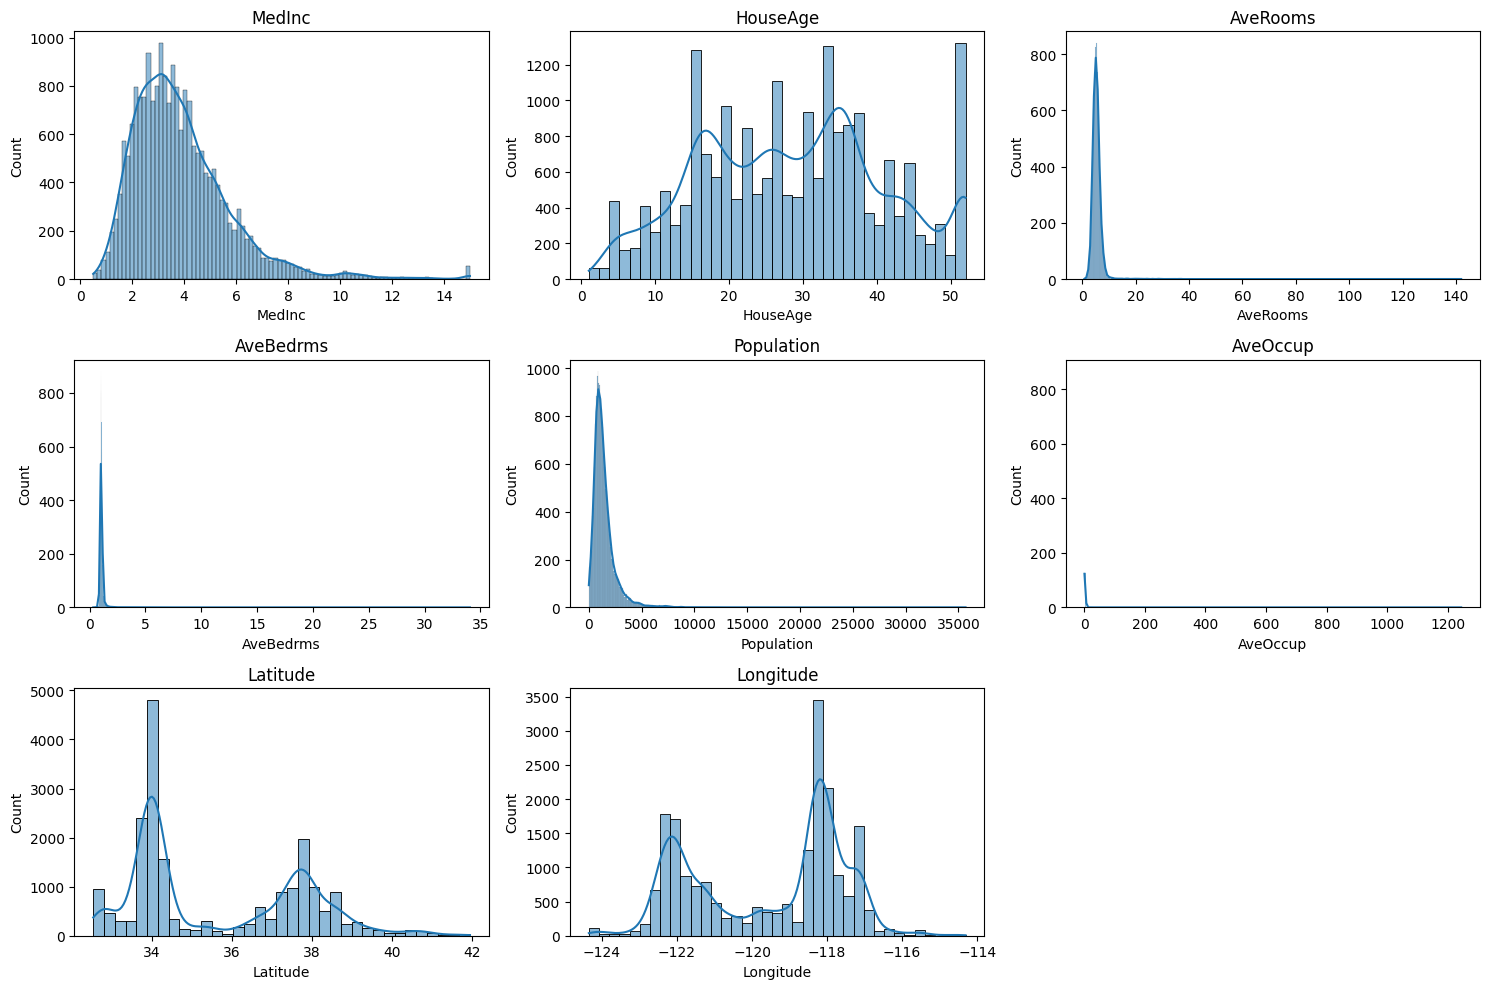

In [100]:
# Visualize 
plt.figure(figsize=(15,10))
for i, col in enumerate(X.columns,1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col],kde = True)
    plt.title(col)
plt.tight_layout()
plt.show()

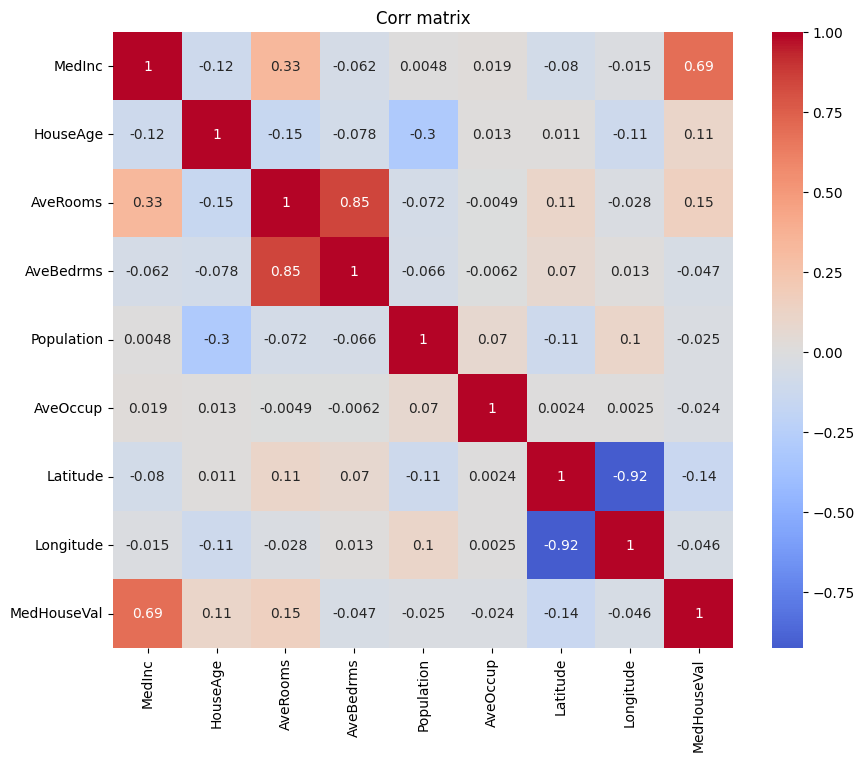

In [107]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap = 'coolwarm',center=0)
plt.title('Corr matrix')
plt.show()

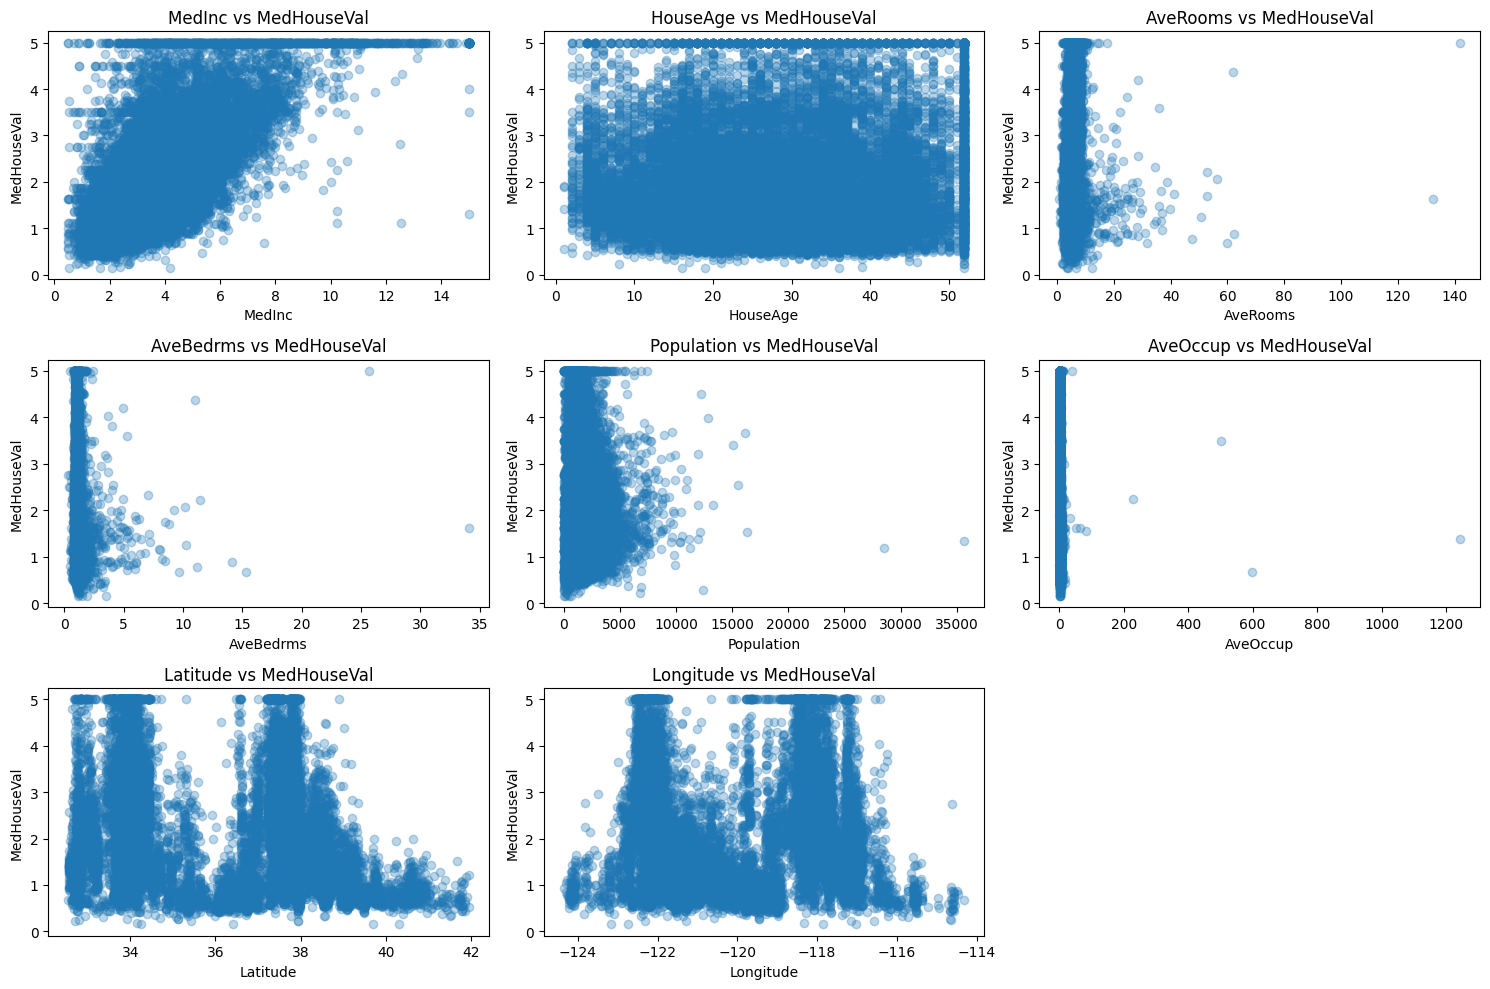

In [109]:
# Checking linearity with scatter plots
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    plt.scatter(data[col],data['MedHouseVal'],alpha=0.3)
    plt.xlabel(col)
    plt.ylabel('MedHouseVal')
    plt.title(f'{col} vs MedHouseVal')
plt.tight_layout()
plt.show()

In [111]:
# multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
#  VIF - It tells how much a feature is copied by other features.
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [112]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
# initialize model
model = LinearRegression()
model.fit(X_train_scaled,y_train)

# Make predictions on x_test data and compare it with y_test
y_pred  = model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("Model Performance : ")
print(f"rmse : {rmse:.2f}")
print(f"r2 : {r2:.2f}")

# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficients':model.coef_
})
print(f"Model Coefficients : \n {coef_df}")

Model Performance : 
rmse : 0.75
r2 : 0.58
Model Coefficients : 
       Feature  Coefficients
0      MedInc      0.854383
1    HouseAge      0.122546
2    AveRooms     -0.294410
3   AveBedrms      0.339259
4  Population     -0.002308
5    AveOccup     -0.040829
6    Latitude     -0.896929
7   Longitude     -0.869842


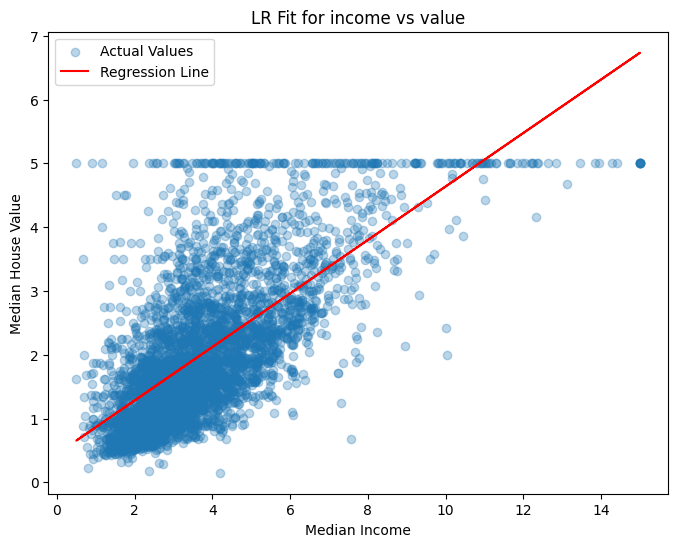

In [119]:
med_inc_test = X_test['MedInc'].values
y_test_pred = model.predict(X_test_scaled)

# Get the values of the 'MedInc' column from X_test
# .values converts it from a pandas Series to a NumPy array
med_inc_test = X_test['MedInc'].values


# Use the trained model to predict target values for the scaled test data
# X_test_scaled is the test data after scaling (standardization/normalization)
y_test_pred = model.predict(X_test_scaled)


# Create a new Linear Regression model
# This model will use only one feature (MedInc)
single_feature_model = LinearRegression()


# Train (fit) the new model using only the 'MedInc' column from training data
# X_train[['MedInc']] keeps it as a DataFrame (double brackets are important)
# y_train is the actual target values
single_feature_model.fit(X_train[['MedInc']], y_train)


# Predict target values using only the 'MedInc' feature from test data
# This gives predictions from the single-feature model
y_pred_single = single_feature_model.predict(X_test[['MedInc']])


plt.figure(figsize=(8,6))
plt.scatter(med_inc_test,y_test,alpha=0.3,label="Actual Values")
plt.plot(med_inc_test,y_pred_single,color='red',label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('LR Fit for income vs value')
plt.legend()
plt.show()

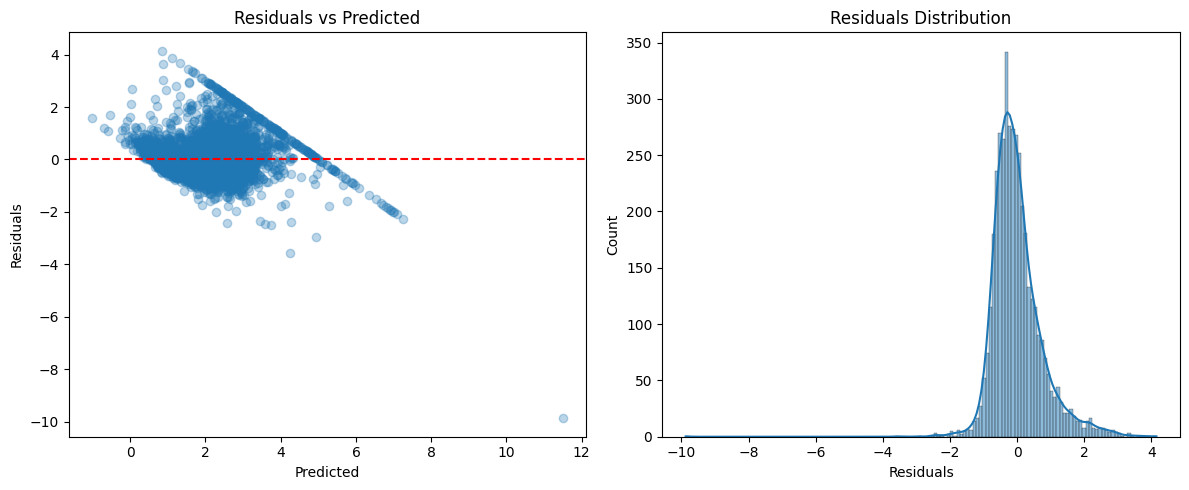

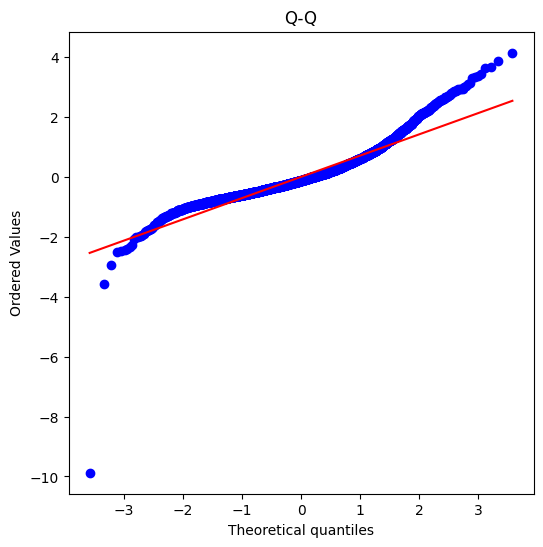

In [123]:
# calculate Residuals -- The difference between real value and predicted value.
residuals = y_test - y_pred

plt.figure(figsize=(12,5))

# Scatter
plt.subplot(1,2,1)
plt.scatter(y_pred,residuals,alpha=0.3)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# Histogram 
plt.subplot(1,2,2)
sns.histplot(residuals,kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

# Q-Q plot
from scipy import stats
plt.figure(figsize=(6,6))
stats.probplot(residuals,dist='norm',plot=plt)
plt.title('Q-Q')
plt.show()